<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,2683.73,2695.89,2682.36,2695.81,1.870694e+09
2018-01-03,2697.85,2714.37,2697.77,2713.06,1.965922e+09
2018-01-04,2719.31,2729.29,2719.07,2723.99,2.052922e+09
2018-01-05,2731.33,2743.45,2727.92,2743.15,1.798122e+09
2018-01-08,2742.67,2748.51,2737.60,2747.71,1.801472e+09


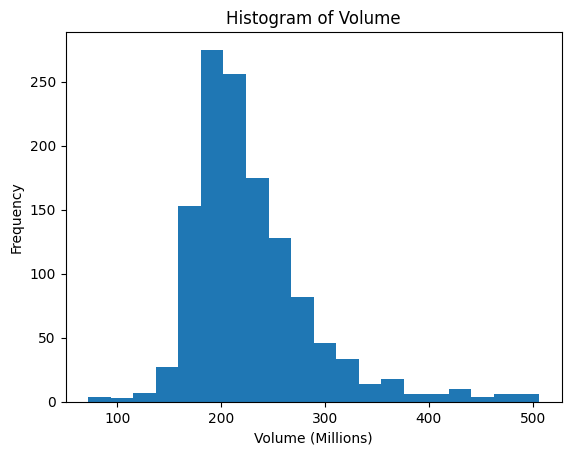

In [17]:
plt.hist(df["Volume"] / 10e6, bins=20)
plt.xlabel("Volume (Millions)")
plt.ylabel("Frequency")
plt.title("Histogram of Volume")
_ = plt.show()

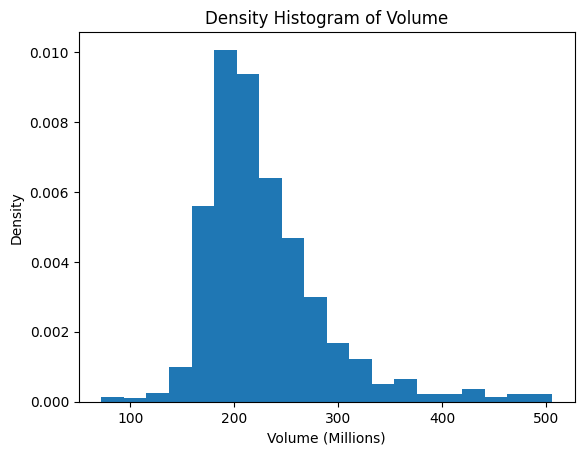

In [18]:
plt.hist(df["Volume"] / 10e6, bins=20, density=True)
plt.xlabel("Volume (Millions)")
plt.ylabel("Density")
plt.title("Density Histogram of Volume")
_ = plt.show()

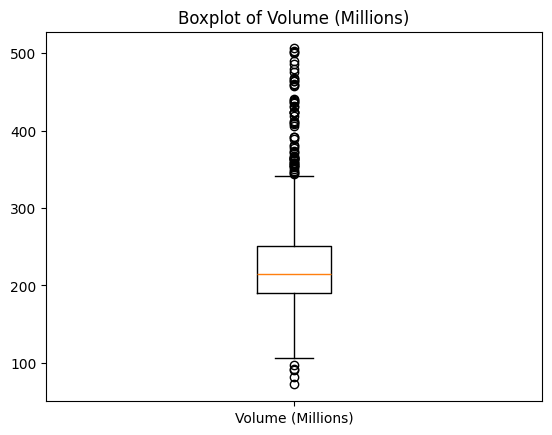

In [19]:
plt.boxplot(df["Volume"] / 10e6, tick_labels=["Volume (Millions)"])
plt.title("Boxplot of Volume (Millions)")
_ = plt.show()

In [20]:
df = pd.read_csv("waw_weather_monthly.csv", index_col="time")
df

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,windspeed_10m_max
time,,,,,,
January,2.53,-1.46,-2.08,-6.49,2.17,22.97
February,5.79,0.23,1.25,-4.45,2.26,23.91
March,7.36,-1.94,3.36,-6.14,0.14,14.35
April,10.39,2.35,6.97,-1.38,2.12,16.93
May,18.42,8.79,16.03,5.85,2.17,19.57
June,24.17,14.23,23.91,13.46,1.76,15.53
July,23.92,15.19,23.31,14.35,3.36,16.80
August,25.84,16.91,26.56,17.26,1.45,13.32
September,16.46,9.04,14.19,6.83,1.61,15.45


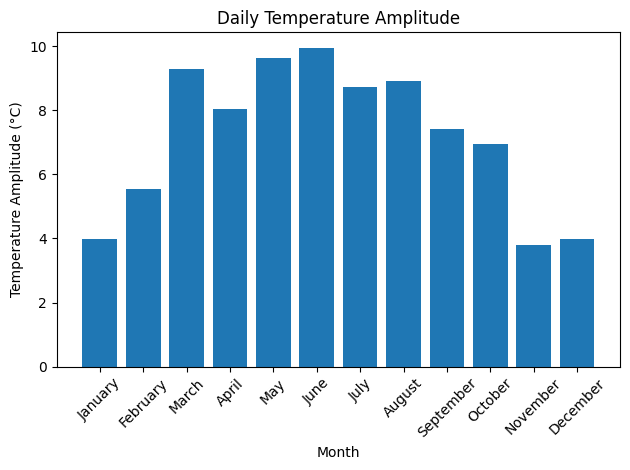

In [21]:
# Calculate daily temperature amplitude
df['Temperature Amplitude'] = df['temperature_2m_max'] - df['temperature_2m_min']

# Create a bar plot
plt.bar(df.index, df['Temperature Amplitude'])
plt.xlabel('Month')
plt.ylabel('Temperature Amplitude (°C)')
plt.title('Daily Temperature Amplitude')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


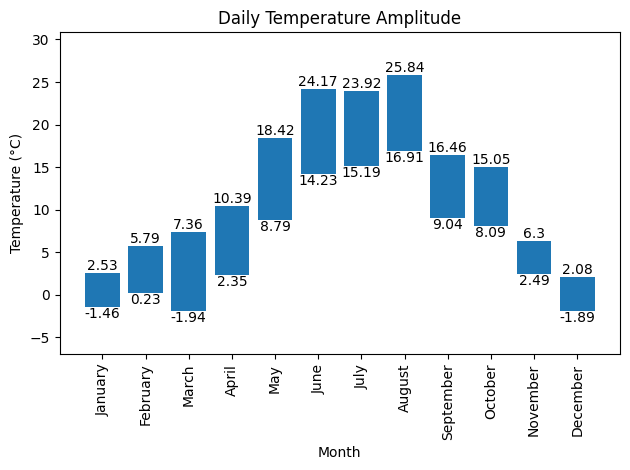

In [22]:
plt.bar(df.index, df['Temperature Amplitude'], bottom=df['temperature_2m_min'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Amplitude')
plt.xticks(rotation=90)
plt.ylim(df['temperature_2m_min'].min() - 5, df['temperature_2m_max'].max() + 5)  # Y- range
plt.tight_layout()

for i, row in df.iterrows():
    plt.annotate(str(row['temperature_2m_min']), (i, row['temperature_2m_min']), ha='center', va='top')
    plt.annotate(str(row['temperature_2m_max']), (i, row['temperature_2m_max']), ha='center', va='bottom')

plt.show()


In [23]:
df = pd.read_csv('world_bank_co2.csv')
df.head()

,Country Name,Country Code,Region,Population,CO2/capita,"GDP/capita, PPP"
0,Afghanistan,AFG,Asia,37769499.0,0.160976,2167.704111
1,Angola,AGO,Africa,32353588.0,0.779203,6881.076241
2,Albania,ALB,Europe,2854191.0,1.692248,14407.365691
3,United Arab Emirates,ARE,Asia,9211657.0,20.502283,74811.690215
4,Argentina,ARG,Americas,44938712.0,3.740650,23003.277181


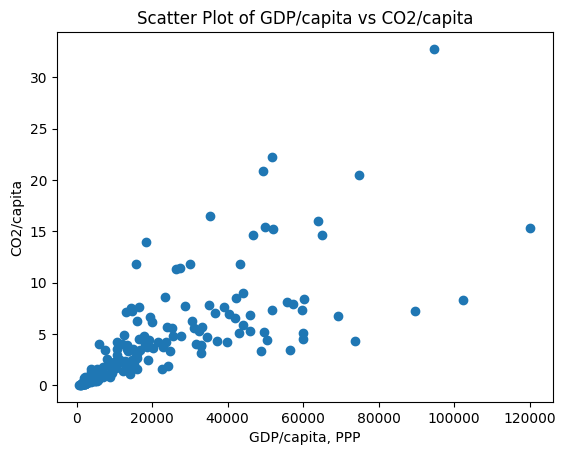

In [24]:
plt.scatter(df['GDP/capita, PPP'], df['CO2/capita'])
plt.xlabel('GDP/capita, PPP')
plt.ylabel('CO2/capita')
plt.title('Scatter Plot of GDP/capita vs CO2/capita')
plt.show()

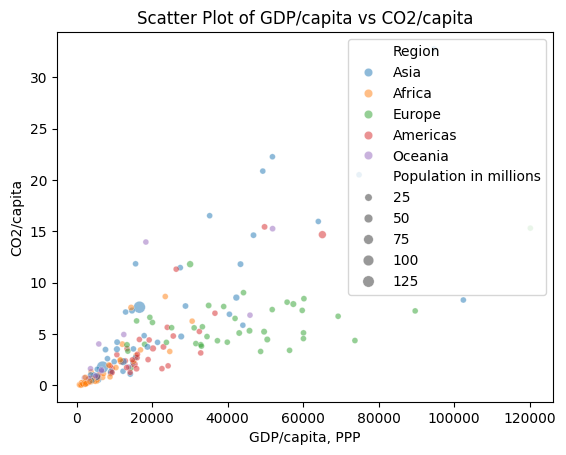

In [25]:
import seaborn as sns
df['Population in millions'] = df['Population'] / 10e6
sns.scatterplot(data=df, x='GDP/capita, PPP', y='CO2/capita', hue='Region', size='Population in millions', alpha=0.5)
plt.xlabel('GDP/capita, PPP')
plt.ylabel('CO2/capita')
plt.title('Scatter Plot of GDP/capita vs CO2/capita')
plt.show()

In [26]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


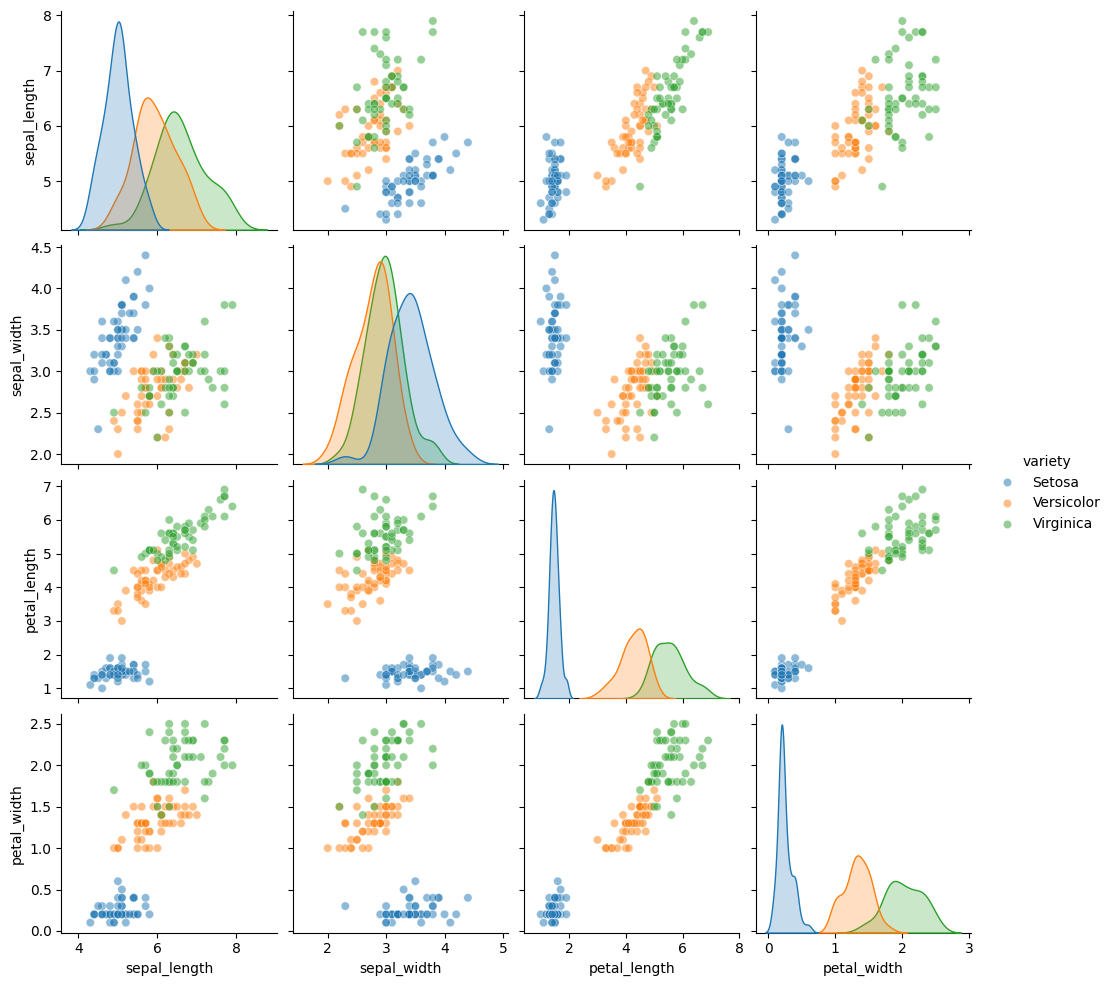

In [27]:
sns.pairplot(data=df, hue="variety", plot_kws={'alpha': 0.5});

In [28]:
import numpy as np
df = pd.read_csv("iris.csv")

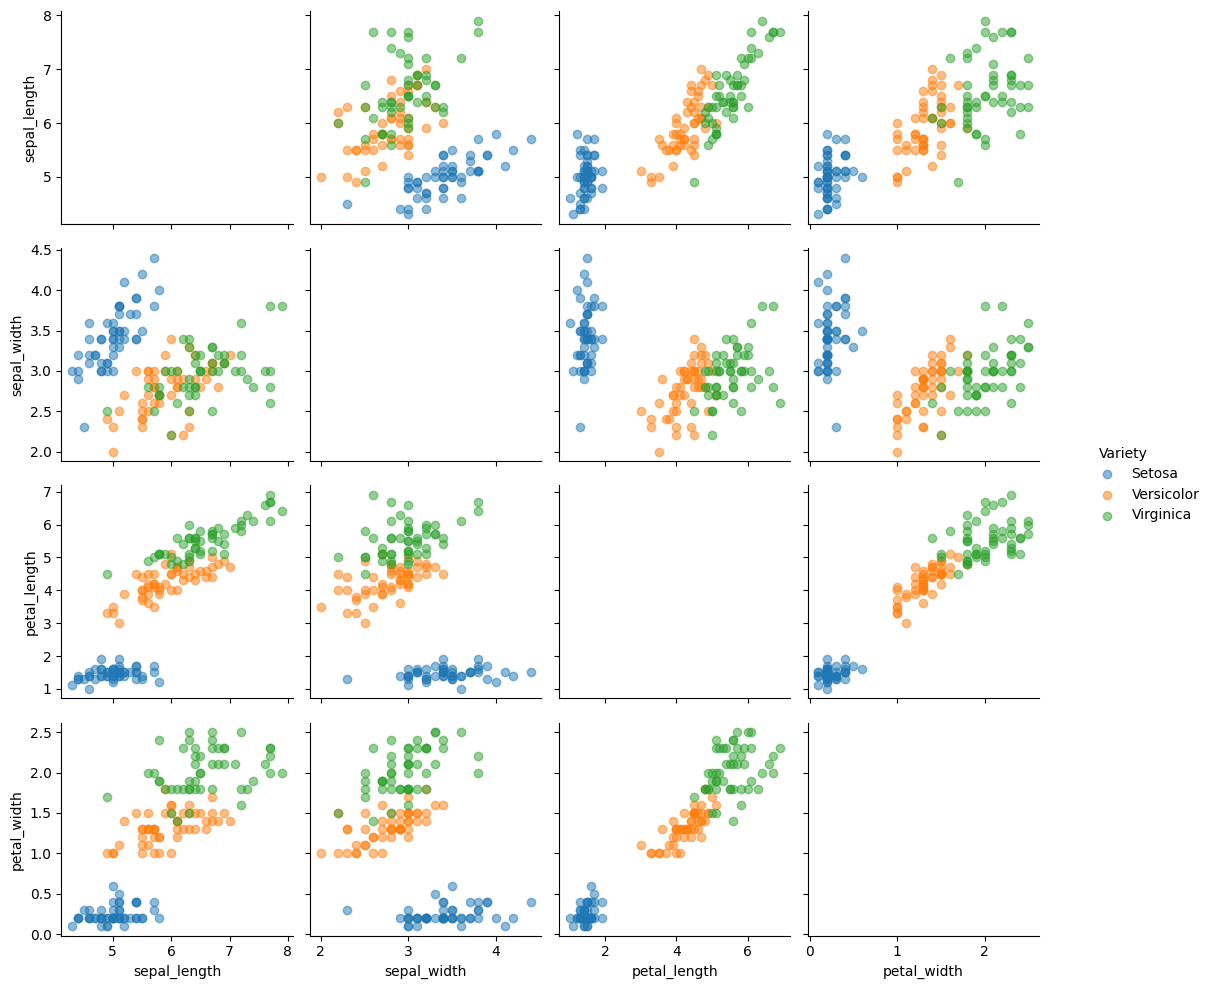

In [29]:
features = df.columns[:-1]
variety = np.array(df['variety'].unique())
fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(12, 10), sharex='col', sharey='row')


for x, variety in enumerate(variety):
  df_subset = df[df['variety'] == variety]
  for i, row in enumerate(features):
      for j, col in enumerate(features):
          if i == j:
            pass
          else:
            axes[i, j].scatter(df_subset[col], df_subset[row], alpha=0.5, label=variety)



for i, row in enumerate(features):
    for j, col in enumerate(features):
        if i == len(features) - 1:
            axes[i, j].set_xlabel(col)
        if j == 0:
            axes[i, j].set_ylabel(row)

plt.tight_layout()


handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0, frameon=False)
plt.subplots_adjust(right=0.87)
plt.figtext(0.92, 0.54, 'Variety', ha='left', va='center')


sns.despine()

plt.show()


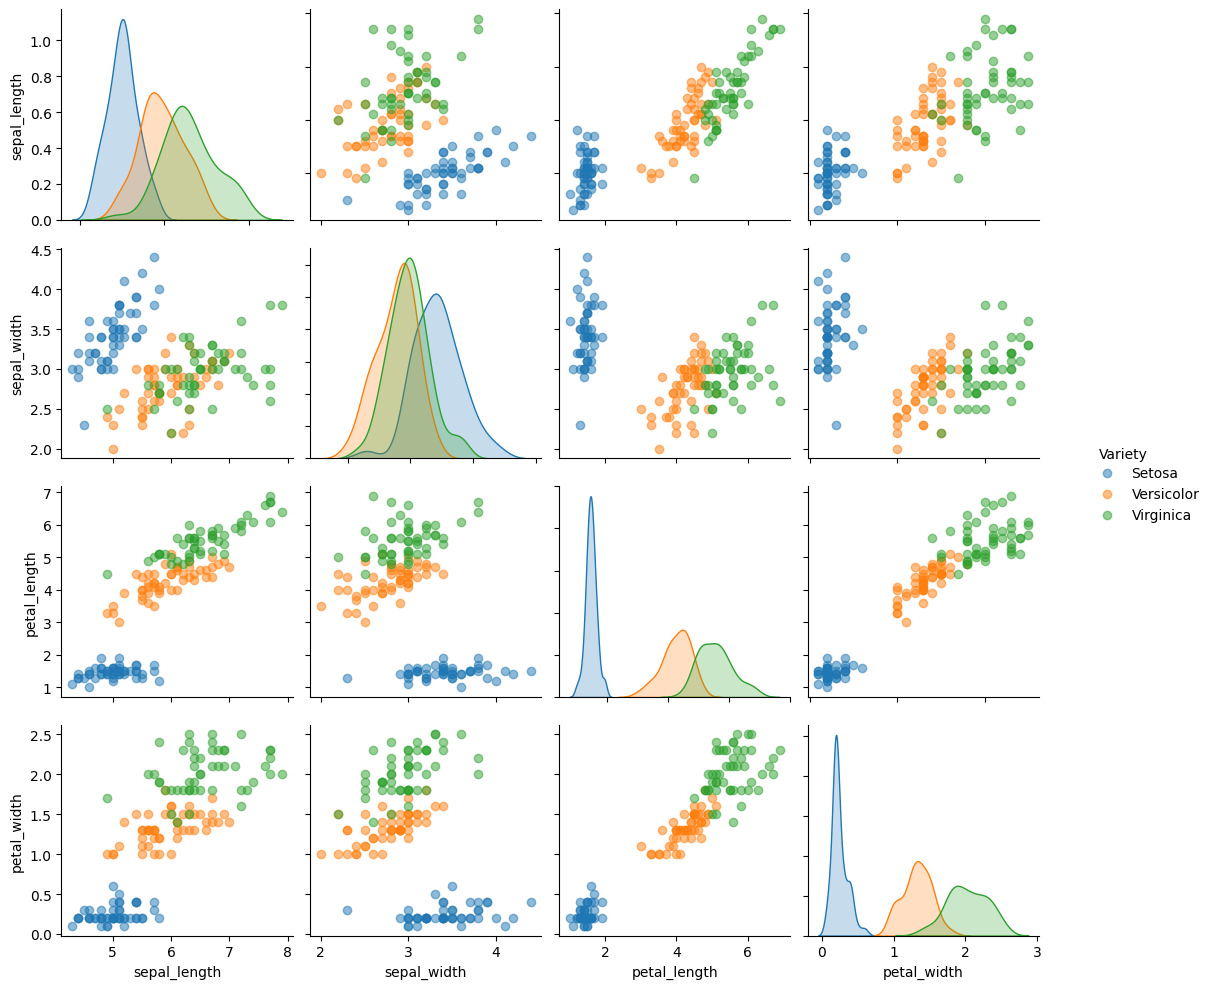

In [30]:
features = df.columns[:-1]
variety = np.array(df['variety'].unique())
fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(12, 10))

for x, variety in enumerate(variety):
  df_subset = df[df['variety'] == variety]
  for i, row in enumerate(features):
      for j, col in enumerate(features):
          ax_ij = axes[i, j]
          if i == j:
            sns.kdeplot(df_subset[col], fill=True, ax=ax_ij, label=variety)
            if i != 0:
              ax_ij.set_ylabel('')
            if j!= len(features) - 1:
              ax_ij.set_xlabel('')
          else:
            ax_ij.scatter(df_subset[col], df_subset[row], alpha=0.5, label=variety)
          # Teraz sprawa cyferek na rantach
          if j != 0:
              ax_ij.set_yticklabels([])
          if i != len(features) - 1:
              ax_ij.set_xticklabels([])

          ax_ij.tick_params(axis='both', which='both',
                           labelbottom=(i == len(features) - 1),
                           labelleft=(j == 0))


#labelki
for i, row in enumerate(features):
    for j, col in enumerate(features):
        if i == len(features) - 1:
            axes[i, j].set_xlabel(col)
        if j == 0:
            axes[i, j].set_ylabel(row)

plt.tight_layout()

# legenda
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0, frameon=False)
plt.subplots_adjust(right=0.87)
plt.figtext(0.92, 0.54, 'Variety', ha='left', va='center')

#remove right and top border
sns.despine()


plt.show()

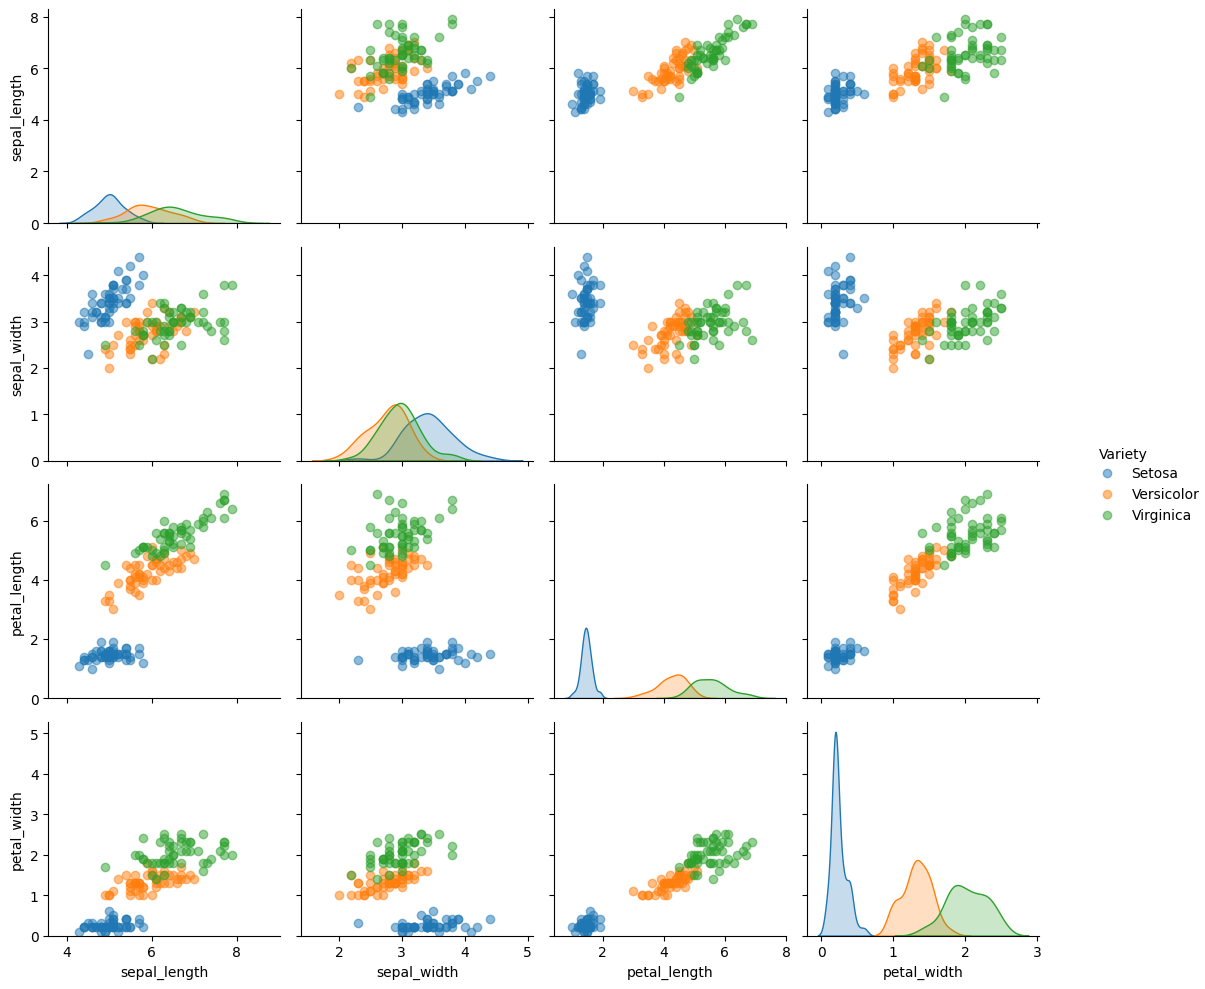

In [ ]:
features = df.columns[:-1]
variety = np.array(df['variety'].unique())
fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(12, 10), sharex='col', sharey='row')


for x, variety in enumerate(variety):
  df_subset = df[df['variety'] == variety]
  for i, row in enumerate(features):
      for j, col in enumerate(features):
          if i == j:
            sns.kdeplot(df_subset[col], fill=True, ax=axes[i, j], label=variety)
          else:
            axes[i, j].scatter(df_subset[col], df_subset[row], alpha=0.5, label=variety)



for i, row in enumerate(features):
    for j, col in enumerate(features):
        if i == len(features) - 1:
            axes[i, j].set_xlabel(col)
        if j == 0:
            axes[i, j].set_ylabel(row)


plt.tight_layout()


handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0, frameon=False)
plt.subplots_adjust(right=0.87)
plt.figtext(0.92, 0.54, 'Variety', ha='left', va='center')

sns.despine()

plt.show()